# Problem Set 1A

## Thomas Pellet

## 04/07/2019

Problem 1

In [ ]:
import sympy as sy
import numpy as np
from sympy.utilities.lambdify import lambdify

x = sy.symbols('x')
def f(x):
    return (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
def fprime(x):
    return sy.diff(f(x),x)
print(fprime(x))

from matplotlib import pyplot as plt
lam_fprime = lambdify(x,fprime(x))
lam_f = lambdify(x,f(x))
x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,lam_fprime(x), 'b-')
plt.plot(x,lam_f(x), 'r-')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.show()

Problem 2

In [ ]:
def forward1(f,x,h):
    return (f(x+h)-f(x))/(h)

def forward2(f,x,h):
    return (4*f(x+h)-f(x+2*h) - 3*f(x))/(2*h)

def backward1(f,x,h):
    return (f(x)-f(x-h))/(h)

def backward2(f,x,h):
    return (3*f(x)-4*f(x-h) +f(x-2*h))/(2*h)

def centered2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def centered4(f,x,h):
    return (f(x-2*h)-8*f(x-h) +8*f(x+h)-f(x+2*h))/(12*h)

x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,lam_fprime(x), 'b:')
plt.plot(x,forward1(lam_f,x,0.01))
plt.plot(x,forward2(lam_f,x,0.01))
plt.plot(x,backward1(lam_f,x,0.01))
plt.plot(x,backward2(lam_f,x,0.01))
plt.plot(x,centered2(lam_f,x,0.01))
plt.plot(x,centered4(lam_f,x,0.01))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.show()

In [ ]:
import numpy as np
x = 0
true = lam_fprime(x)
h = np.logspace(-8, 0,8)
errorf1 = abs(true - forward1(lam_f,x,h))
errorf2 = abs(true - forward1(lam_f,x,h))
errorb1 = abs(true - backward1(lam_f,x,h))
errorb2 = abs(true - backward2(lam_f,x,h))
errorc2 = abs(true - centered2(lam_f,x,h))
errorc4 = abs(true - centered4(lam_f,x,h))

for item in [errorf1,errorf2,errorb1,errorb2,errorc2,errorc4]:
    plt.loglog(h,item,label=str(item))
    
plt.xlabel("h")
plt.ylabel("Absolute Error")

In [ ]:
errorf1.legend = "test"

In [ ]:
str(errorf1)

In [12]:
# Problem 5
import numpy as np

def seconddiff(f,X,h):
    col = len(X)
    row = len(f(X))
    I = np.eye(len(X))
    output = np.zeros((row,col))
    for i,item in enumerate(X):
        total = (f(X + h*I[:,i]) - f(X - h*I[:,i]))/(2*h)
        for j,item in enumerate(total):
            output[j,i] = item
    return output

def f(X):   
    return np.array([X[0]**2,X[0]**3-X[1]]).reshape((-1,1))


[ 85  85 441]


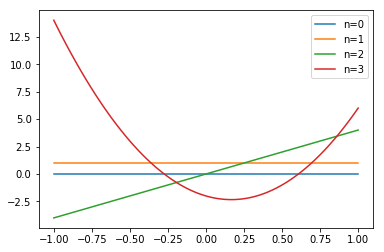

In [87]:
# Problem 6
from autograd import elementwise_grad
import numpy as np
from autograd import numpy as anp
from matplotlib import pyplot as plt

def Chebypol(x,n):
    t = np.array([x])
    result = np.zeros((n+1,t.size))
    result[0,:] = 1
    result[1,:] = t
    for i in np.arange(2,n+1):
        result[i,:] = 2*np.multiply(t,result[i-1,:]) - result[i-2,:]
    return result[n,:]

def Chebypol(x,n):
    if n == 0:
        return anp.ones_like(x)
    if n == 1:
        return x
    else:
        i = 1
        term1 = x
        term2 = 1
        while i < n:
            result = 2*x*term1 - term2
            term1 = result
            term2 = term1
            i = i + 1
    return result

x = np.array([3,3,5])
print(Chebypol(x,3))

d_Chebypol = elementwise_grad(Chebypol)

x = np.linspace(-1,1,100)
for i in np.arange(4):
    labb = "n=" + str(i)
    plt.plot(x,d_Chebypol(x,i),label="n=%d" % i)
    
plt.legend()
plt.show()


# Newton's Method

In [96]:
# Problem 1
import numpy as np
def newton(x0,f,df,tol=1e-5,maxiter=15):
    Bool = False
    for k in range(maxiter):
        x1 = x0 - f(x0)/(df(x0))
        if abs(x1 - x0) < tol:
            Bool = True
            print("Converged",Bool,"\n","Number of iterations",k)
            return x1
            break
        x0 = x1
f = lambda x: np.exp(x) -2
df = lambda x: np.exp(x)
newton(10,f,df)

Converged True 
 Number of iterations 13


0.6931471805599453

In [102]:
# Problem 2
import numpy as np

def f(N1,N2,P1,P2,r):
    return P1*((1+r)**N1-1) - P2*(1-(1+r)**(-N2))
def df(N1,N2,P1,P2,r):
    return N1*P1*(1+r)**(N1-1) - N2*P2*(1+r)**(-N2-1)

def newtonr(r0,f,df,N1,N2,P1,P2,tol=1e-5,maxiter=15):
    Bool = False
    for k in range(maxiter):
        r1 = r0 - f(N1,N2,P1,P2,r0)/(df(N1,N2,P1,P2,r0))
        if abs(r1 - r0) < tol:
            Bool = True
            print("Converged",Bool,"\n","Number of iterations",k)
            return r1
            break
        r0 = r1

r0 = 0.1
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000
print(f(N1,N2,P1,P2,r0))
newtonr(r0,f,df,N1,N2,P1,P2)


26087.953561966046
Converged True 
 Number of iterations 5


0.03877843223027751

In [105]:
# Problem 3
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)

df = elementwise_grad(f)

# Problem 1
import numpy as np
def newton(x0,f,df,tol=1e-5,maxiter=15,alpha=1):
    Bool = False
    for k in range(maxiter):
        x1 = x0 - alpha*f(x0)/(df(x0))
        if abs(x1 - x0) < tol:
            Bool = True
            print("Converged",Bool,"\n","Number of iterations",k)
            return x1
            break
        x0 = x1
    print("Did not converge")
newton(0.01,f,df,alpha=0.4)

Converged True 
 Number of iterations 5


6.399999999999913e-07

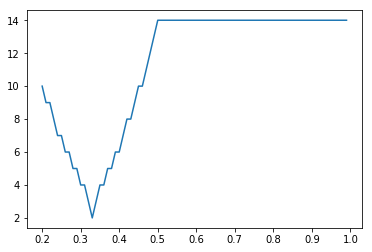

0.3300000000000001

In [129]:
# Problem 4
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
df = elementwise_grad(f)

def newtonalpha(x0,f,df,tol=1e-5,maxiter=15):
    result = np.arange(0.2,1,0.01)
    parameter = np.arange(0.2,1,0.01)
    init = x0
    for i,alpha in enumerate(result):
        x0 = init
#         print(alpha)
        Bool = False
        for k in range(maxiter):
#             print(k)
            x1 = x0 - alpha*f(x0)/(df(x0))
            if abs(x1 - x0) < tol:
                Bool = True
#                 print("Converged",Bool,"\n","Number of iterations",k)
                result[i] = k
                break
            x0 = x1
            result[i] = k
    plt.plot(parameter,result)
    plt.show()
    table = np.array([parameter,result])
    return table[0,np.argmin(table[1,:])]
       
result = newtonalpha(0.1,f,df)
result

(500, 500)
(500, 500)


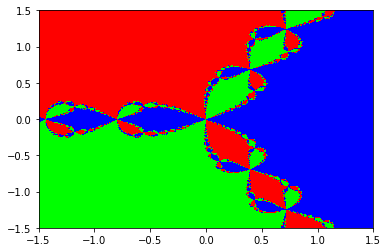

In [157]:
# Problem 7
rmin = -1.5
rmax = 1.5
imin = -1.5
imax = 1.5
from matplotlib import pyplot as plt
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
zeros = np.array([1,-0.5+1j*np.sqrt(3)/2,-0.5-1j*np.sqrt(3)/2])
res = 500
def newton3(rmin,rmax,imin,imax,f,Df,zeros,res,iter=15):
    x_real = np.linspace(rmin, rmax, res) # Real parts.
    x_imag = np.linspace(imin, imax, res) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    X_test = X_0
#     print(X_0)
    for k in range(iter):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    Rootrange = range(len(zeros))
    Y = np.zeros_like(X_0)
    for i in range(X_1.shape[0]):
        for j in range(X_1.shape[1]):
            delta = abs(X_1[i,j] - zeros)
            Y[i,j] = np.argmin(delta)
    return Y,X_real,X_imag, X_test
Y, X_real, X_imag, X_test = newton3(rmin,rmax,imin,imax,f,Df,zeros,res,iter=15)
print(Y.shape)
print(X_test.shape)
plt.pcolormesh(X_real,X_imag,Y.real,cmap="brg")
plt.show()